In [1]:
# importar librerias
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from scipy.stats import binom

# Problema a resolver

Esta base de datos contiene datos de una compañía de Guatemala que comercializa sus productos enviando catálogos de sus productos directamente a los clientes. La compañía compró de un servicio local una lista de 100,000 nombres (teléfonos y direcciones). Para determinar que tan "buena" es esta lista, la compañía envio catálogos a 1700 clientes de la lista (una muestra representativa de la población).  La hoja "Base de datos.xlsx"  reporta los resultados de este ejercicio

* Si el costo de enviar un catálogo es 15 Quetzales (costo de imprimir y costo de flete), estime la utilidad que la compañía espera recibir si envía el catálogo a todos los 98,300 nombres restantes. Usted puede suponer al hacer este cálculo que 20% del precio pagado por un consumidor representa ganancia pura para la compañía. El otro 80% refleja el costo de producir el bien (este costo no incluye el costo de envío de 15 Q).	



### Descripción de las variables

| Variable | Descripción de la variable | Tipo |
| ------------ | ------------ | ------------ |
| Guatemala    | La direccion esta registrada en Ciudad de Guatemala  |Binaria (1: Si, 0: No)|
| Frecuencia    | Número de transacciones del cliente en los ultimso 12 meses    |Numerica|
| Último |Dias desde la ultima compra realizada por el cliente |Numerica|
|Primero|Dias desde la primera compra realizada por el cliente|Numerica|
|Digital|El cliente ha realizado compras por medio del sitio Web|Binaria (1: Si, 0: No)|
|Hombre|Genero del cliente es hombre|Binaria (1: Si, 0: No)|
|Residencial|La direccion del cliente es residencial|Binaria (1: Si, 0: No)|
|Gasto|Total gastado por el cliente en las compras del catalogo|Numerica Quetzales|

In [99]:
df = pd.read_excel("Base_datos.xlsx")
df2 = pd.read_excel("Base_prueba.xlsx")

In [177]:
df.iloc[:,1:9]

,Guatemala,Residencial,Frecuencia,Ultimo,Primero,Digital,Hombre,Gasto
0,1,0,1,2677,2677,0,1,0.00
1,1,0,2,520,1008,1,1,211.50
2,1,0,1,3249,3249,0,0,0.07
3,1,0,1,2675,2675,0,1,29.50
4,0,0,1,1322,1322,0,1,0.00
...,...,...,...,...,...,...,...,...
1695,1,1,3,486,1849,0,1,265.56
1696,1,0,4,2052,2457,1,0,354.57
1697,1,1,2,1752,1771,0,0,0.06
1698,1,1,2,1856,1891,0,0,0.06


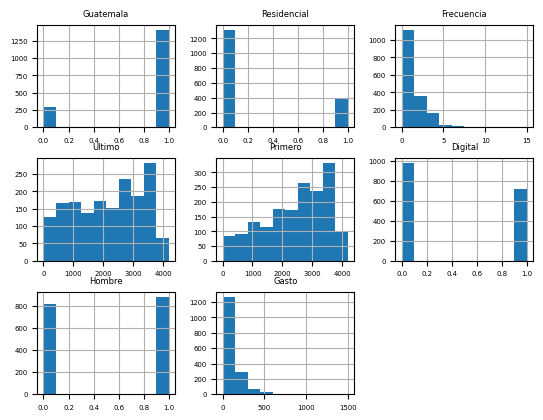

In [178]:
histogramas = df.iloc[:,1:9]
plt.rcParams.update({'font.size': 5})
histogramas.hist()
plt.show()

### Limpieza de datos

> Verificando las columnas que tienen datos vacios

In [101]:
porcentaje_vacios = df.isnull().mean() * 100
print(porcentaje_vacios)

Identificador    0.0
Guatemala        0.0
Residencial      0.0
Frecuencia       0.0
Ultimo           0.0
Primero          0.0
Digital          0.0
Hombre           0.0
Gasto            0.0
dtype: float64


Calculando la variable dependiente, para decidir a quien enviarselo y a quien no.

In [102]:
df["var_y"] = df.apply(lambda x: "no enviar" if x.Gasto == 0 
                       else "no enviar" if  ((x.Gasto *0.8)+15) > x.Gasto 
                       else "enviar" , axis = 1  )

In [103]:
X = df[['Guatemala', 'Residencial', 'Frecuencia',
        'Primero','Digital','Hombre']].values
X[0:5]

array([[   1,    0,    1, 2677,    0,    1],
       [   1,    0,    2, 1008,    1,    1],
       [   1,    0,    1, 3249,    0,    0],
       [   1,    0,    1, 2675,    0,    1],
       [   0,    0,    1, 1322,    0,    1]], dtype=int64)

In [104]:
y = df["var_y"]
y[0:5]

0    no enviar
1       enviar
2    no enviar
3    no enviar
4    no enviar
Name: var_y, dtype: object

### Configurando el Arbol de Decisión

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

### Modelando

In [144]:
from sklearn.tree import DecisionTreeClassifier
envio_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 15 )
envio_tree # muestra los parámetros por omisión

DecisionTreeClassifier(criterion='entropy', max_depth=15)

In [145]:
envio_tree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

In [146]:
y_trainset

1194       enviar
319        enviar
42         enviar
1456       enviar
1557       enviar
          ...    
968        enviar
952        enviar
1667    no enviar
1273       enviar
1688       enviar
Name: var_y, Length: 1190, dtype: object

### Predicción

In [147]:
predTree = envio_tree.predict(X_testset)

In [148]:
print (predTree [0:5])
print (y_testset [0:5])

['no enviar' 'no enviar' 'enviar' 'no enviar' 'enviar']
1432    no enviar
1201       enviar
1262       enviar
612     no enviar
592        enviar
Name: var_y, dtype: object


### Evaluación

Luego, importemos __metrics__ de sklearn y revisemos la precisión del modelo.

In [139]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Precisión de los Arboles de Decisión: ", metrics.accuracy_score(y_testset, predTree))

Precisión de los Arboles de Decisión:  0.7568627450980392


## Utilización de Lasso para evitar el sobre ajuste

El lazo es una estrategia utilizada para evitar el sobreajuste en los árboles de decisión, lo cual implica que el modelo se ajuste demasiado a los datos de entrenamiento y tenga dificultades para generalizar correctamente a nuevos datos.

La técnica del lazo se basa en podar o eliminar ramas o nodos del árbol que no son necesarios o que no contribuyen significativamente a la precisión del modelo. Al eliminar estas ramas o nodos, se reduce la complejidad del árbol y se evita el sobreajuste.

In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split

X = df[['Guatemala', 'Residencial', 'Frecuencia', 'Primero', 'Digital', 'Hombre']].values
y = df["var_y"]
 
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Parámetros para el lazo
num_iterations = 10
best_accuracy = 0
best_f1_score = 0
best_tree = None

# Realizar el lazo
for _ in range(num_iterations):
    # Crear el árbol de decisión sin poda
    tree = DecisionTreeClassifier(criterion="entropy")
    tree.fit(X_train, y_train)

    # Calcular la precisión del modelo sin poda
    predTree = tree.predict(X_test)
    accuracy = accuracy_score(y_test, predTree)
    print("Precisión sin poda:", accuracy)

    # Calcular el puntaje F1 del modelo sin poda
    f1 = f1_score(y_test, predTree, pos_label='enviar')
    print("Puntuación F1 sin poda:", f1)
    

    # Aplicar la poda al árbol de decisión
    path = tree.cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas = path.ccp_alphas
    trees = []
    for alpha in ccp_alphas:
        pruned_tree = DecisionTreeClassifier(criterion="entropy", ccp_alpha=alpha, max_depth=100)
        pruned_tree.fit(X_train, y_train)
        trees.append(pruned_tree)

    # Evaluar la precisión y el puntaje F1 de los árboles podados y seleccionar el mejor modelo
    for tree in trees:
        predTree = tree.predict(X_test)
        accuracy = accuracy_score(y_test, predTree)
        f1 = f1_score(y_test, predTree,pos_label='enviar')
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_f1_score = f1
            best_tree = tree

# Resultados finales después del lazo
print("Mejor precisión después de la poda:", best_accuracy)
print("Mejor puntuación F1 después de la poda:", best_f1_score)

# Obtener la matriz de confusión del mejor modelo
y_pred = best_tree.predict(X_test)
confusion = confusion_matrix(y_test, y_pred, labels=['enviar', 'no enviar'])
print("Matriz de confusión:")
print(confusion)

Precisión sin poda: 0.7588235294117647
Puntuación F1 sin poda: 0.6977886977886978
Precisión sin poda: 0.7568627450980392
Puntuación F1 sin poda: 0.6960784313725489
Precisión sin poda: 0.7588235294117647
Puntuación F1 sin poda: 0.7007299270072993
Precisión sin poda: 0.7627450980392156
Puntuación F1 sin poda: 0.7027027027027026
Precisión sin poda: 0.7549019607843137
Puntuación F1 sin poda: 0.6943765281173594
Precisión sin poda: 0.7588235294117647
Puntuación F1 sin poda: 0.7007299270072993
Precisión sin poda: 0.7588235294117647
Puntuación F1 sin poda: 0.6977886977886978
Precisión sin poda: 0.7588235294117647
Puntuación F1 sin poda: 0.6992665036674817
Precisión sin poda: 0.7607843137254902
Puntuación F1 sin poda: 0.702439024390244
Precisión sin poda: 0.7588235294117647
Puntuación F1 sin poda: 0.6992665036674817
Mejor precisión después de la poda: 0.7784313725490196
Mejor puntuación F1 después de la poda: 0.6762177650429798
Matriz de confusión:
[[118  76]
 [ 37 279]]


In [142]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import pydotplus
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 


(process:12500): GLib-GIO-WARNING **: 21:52:34.471: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2304.21.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:12500): GLib-GIO-WARNING **: 21:52:34.477: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.6.2.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs



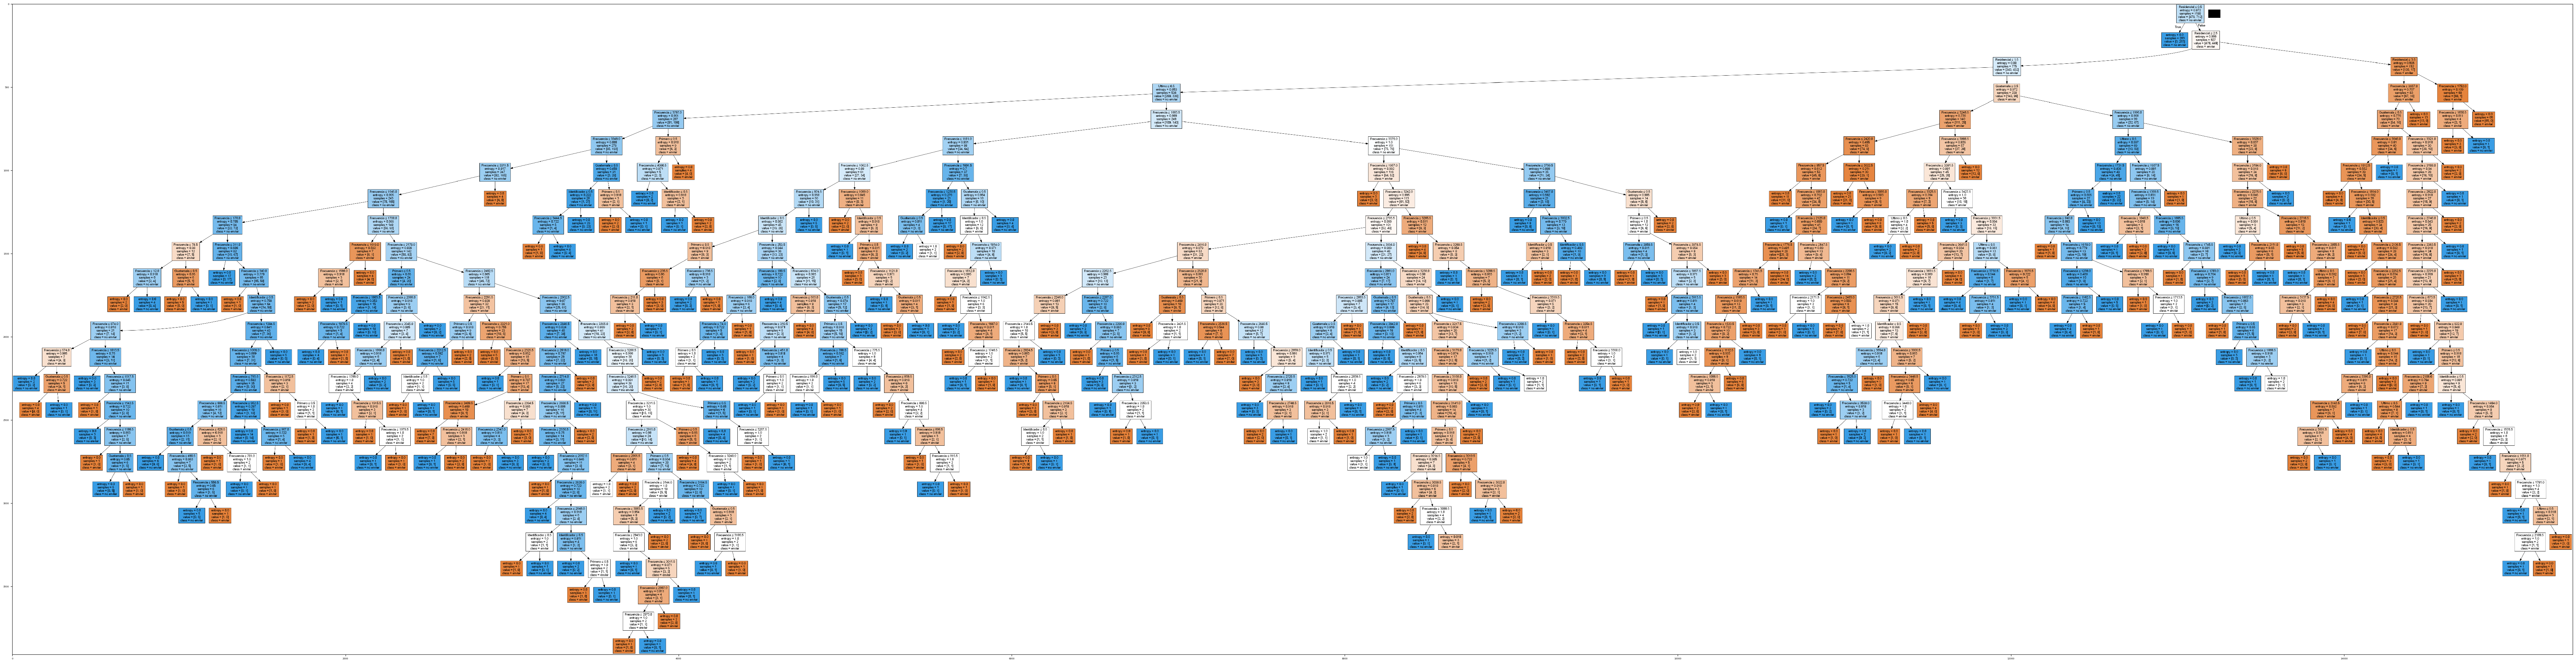

In [143]:
dot_data = StringIO()
filename = "enviar_catalogo.png"
featureNames = df.columns[0:6]
targetNames = df["var_y"].unique().tolist()
out=tree.export_graphviz(envio_tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')
plt.show()

#### Predicción sin haber sido visto antes la data

In [114]:
X2_test = df2[['Guatemala', 'Residencial', 'Frecuencia',
        'Primero','Digital','Hombre']].values

In [115]:
best_tree.predict(X2_test)

array(['no enviar', 'no enviar', 'no enviar', 'enviar', 'no enviar',
       'no enviar', 'no enviar', 'enviar', 'no enviar', 'enviar',
       'no enviar', 'enviar', 'no enviar', 'no enviar', 'no enviar',
       'enviar', 'no enviar', 'enviar', 'enviar', 'no enviar', 'enviar',
       'no enviar', 'no enviar', 'no enviar', 'no enviar', 'no enviar',
       'no enviar', 'no enviar', 'no enviar', 'enviar', 'no enviar',
       'no enviar', 'no enviar', 'no enviar', 'enviar', 'no enviar',
       'no enviar', 'no enviar', 'no enviar', 'no enviar', 'no enviar',
       'enviar', 'no enviar', 'no enviar', 'no enviar', 'no enviar',
       'no enviar', 'enviar', 'no enviar', 'no enviar', 'no enviar',
       'no enviar', 'no enviar', 'no enviar', 'no enviar', 'enviar',
       'enviar', 'no enviar', 'no enviar', 'no enviar', 'enviar',
       'no enviar', 'no enviar', 'no enviar', 'enviar', 'no enviar',
       'no enviar', 'no enviar', 'no enviar', 'enviar', 'no enviar',
       'no enviar', 'no enviar